In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [5]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

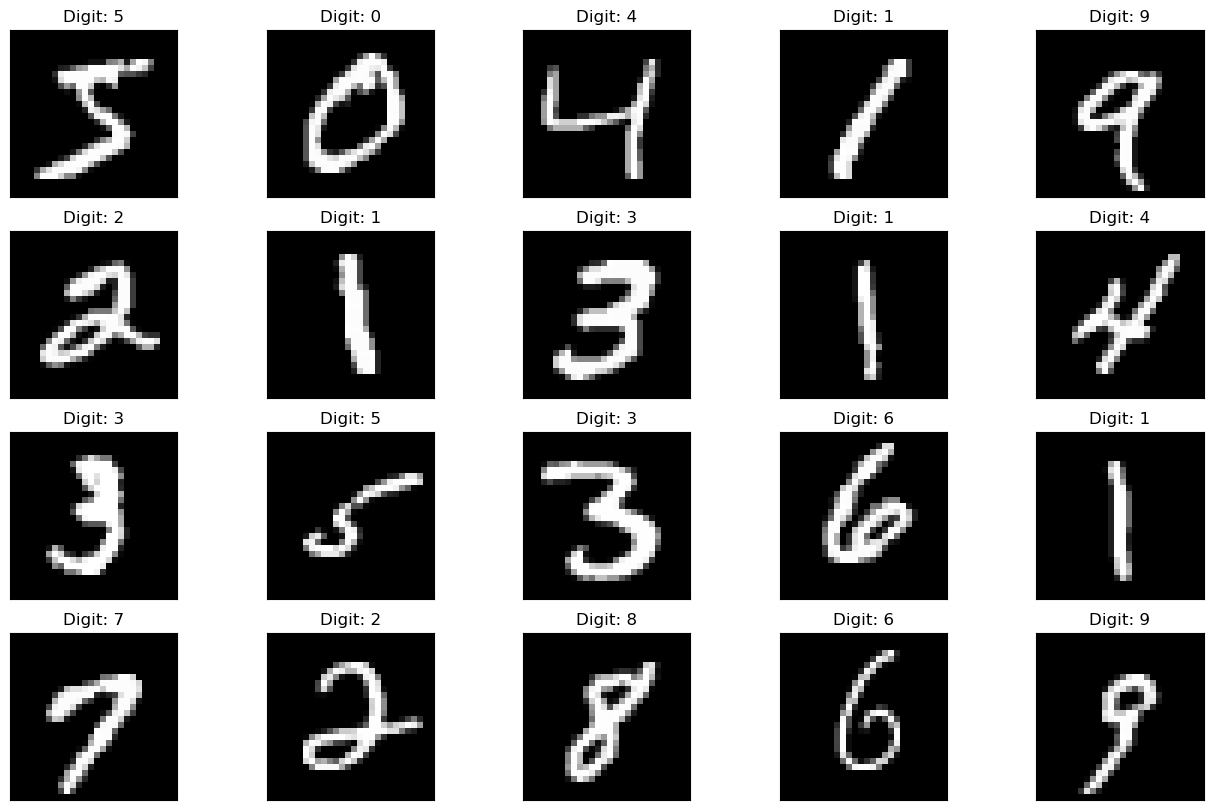

In [6]:
def plot_digit(image, digit, plt, i):
 plt.subplot(4, 5, i + 1)
 plt.imshow(image, cmap=plt.get_cmap('gray'))
 plt.title(f"Digit: {digit}")
 plt.xticks([])
 plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
 plot_digit(X_train[i], y_train[i], plt, i) 
plt.show()

In [7]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [8]:
model = Sequential([
 Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(100, activation="relu"),
 Dense(10, activation="softmax")
])


In [9]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
 optimizer=optimizer, 
 loss="sparse_categorical_crossentropy", 
 metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [11]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2345 - accuracy: 0.9290 - val_loss: 0.1022 - val_accuracy: 0.9678
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0777 - accuracy: 0.9765 - val_loss: 0.0586 - val_accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.0527 - val_accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0494 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0438 - val_accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0453 - val_accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0455 -

1/1 [==============================] - 0s 46ms/step


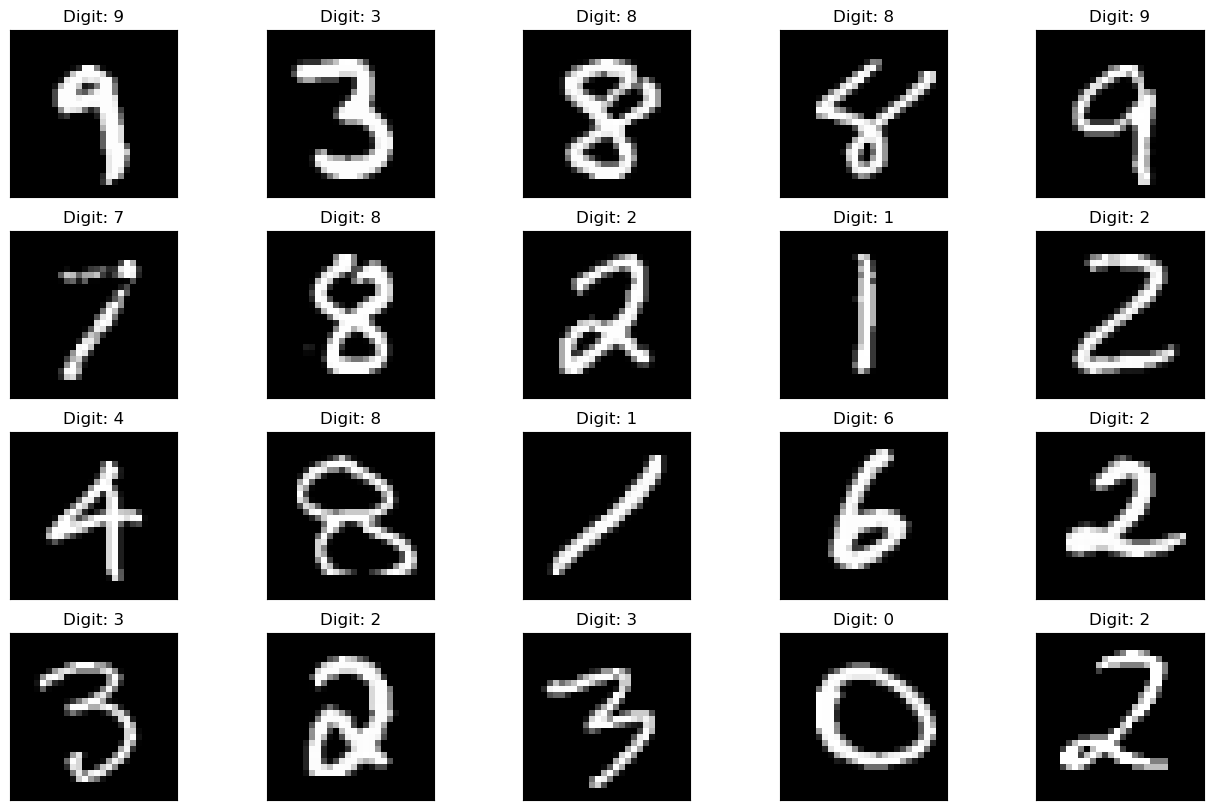

In [12]:
plt.figure(figsize=(16, 10))
for i in range(20):
 image = random.choice(X_test).squeeze()
 digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
 plot_digit(image, digit, plt, i)
plt.show()

In [13]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 3s 10ms/step


0.9869

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])    #Test Loss
print('Test accuracy:', score[1])    #Test Accuracy

Test loss: 0.044482626020908356
Test accuracy: 0.9868999719619751


In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 10
epochs_range = range(epochs)

<Figure size 640x480 with 0 Axes>

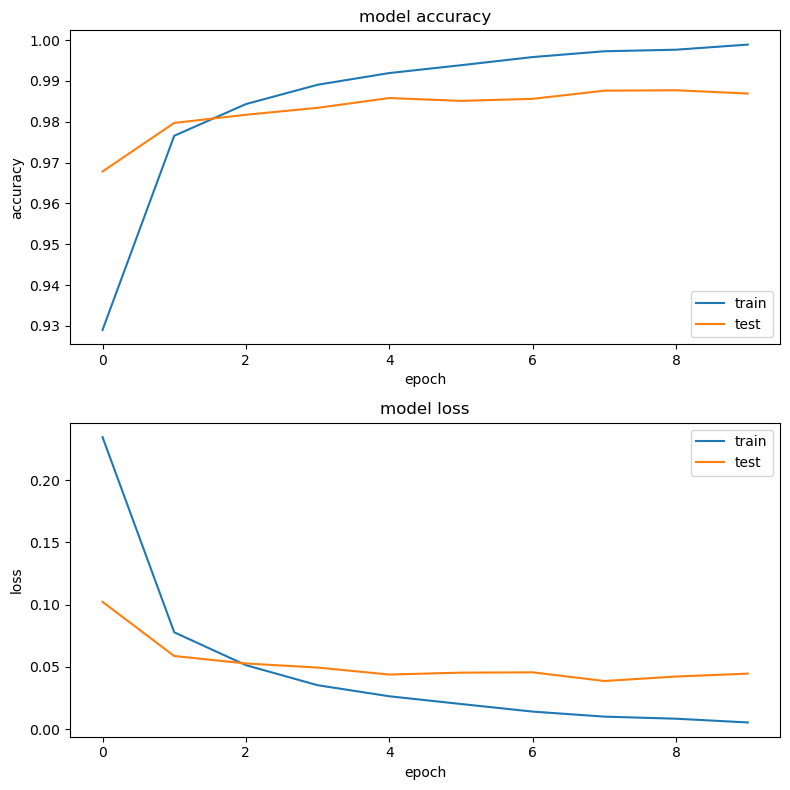

In [16]:
import os

fig = plt.figure()
plt.figure(figsize=(8, 8))

plt.subplot(2,1,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


plt.subplot(2,1,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()